# Lecture 2 - Pandas and EDA

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)

Authored by [Carlos Gonzalez](carlos01oscar@berkeley.ed), [Roland Chin](rond24933chn@berkeley.edu), [Ajay Raj](araj@berkeley.edu), [Adish Jain](adish.jain@berkeley.edu), [James Cheng](jamescheng@berkeley.edu), [Suparna Kompalli](skompalli@berkeley.edu), and [Aidan Curran](aidan.miguel.curran@berkeley.edu).

Case Study created by [Claire Mai](clairemai@berkeley.edu)

**Welcome to the 2nd Data Foundations Lecture!** Here we'll be walking through some preparatory steps to onboard you into the world of data science and give you a glimpse of just how powerful these tools can be.

# But first, imports

Data science thrives off the backs of a million different packages and tools, which you will likely become extremely familiar with and hopefully contribute to yourself in the future! Here's how we use them

*You may need to install using pip. We'll be walking around the check that this works.*

In [23]:
#if these imports do not work (e.g., "TypeError: Could Not Import Pandas"), then uncomment the below cells and run a pip installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib.pyplot
#!pip install seaborn

# NumPy! (does not rhyme with lumpy)



An introduction to your best friend in the realm of data science. Numpy is an optimized math library for Python. The code is vectorized as much as possible, which means that there's a heavy focus on using arrays (treated as n-dimensional vectors) to do operations. This is a shift away from doing looped operations, and much, much **much** faster under the hood.

For example:
If you wanted to compute the **dot product** of 2 arrays, `[1, 2, 3, 4, 5]` and `[5, 4, 3, 2, 1]` = `1*5 + 2*4 + 3*3 + 4*2 + 5*1`, you could either loop through two **lists** in Python

```python
sum = 0
for v1, v2 in zip(arr1, arr2): # iterates through the lists at the same time
    sum += v1*v2
```

**Or**, you could perform all the multiplications at once, and then add them together. That's basically what NumPy does behind the scenes. So doing the dot product in NumPy is very simple:

```python
dot_product = arr1.dot(arr2)
```

Unless you take 61C, you'll never need to know just what kind of magic is going on behind the scenes (numpy is basically just C in stilts and a big trench coat), but we can all benefit from how useful it is!

Before we begin, vectors are single dimensional matrices, and a matrix is multidimensional. In Numpy, we represent both with np.arrays, as we did above. We can also use np.matrix, but arrays are faster performance wise, and matrices are less easily manipulated and are inherently 2 dimensional.

<img src="Images/vm.png" alt="Drawing" style="width: 800px"/>

Linear algebra is **absolutely critical** to the world of data science as a whole and while you won't need to nail these concepts fully until you take Math 54 later on in your data science journey, it's never too early to start! Their representational versatility and mathematical adaptibility make for an unbeatable data structure to use to represent whatever you need, and some mathematical operations for matrices have very interesting, unexpected applications which you'll see down the line.

In [3]:
v = np.array([1, 2, 3, 4, 5]) #creating an array
v

array([1, 2, 3, 4, 5])

In [4]:
v[2] #Indexing into it (start from 0!)

3

# Zero-Indexing!!!!!!


*In Python, most data structures are zero-indexed, which means that the indexing of elements starts from 0. Here is a funny video of Professor John Denero leading the football crowd, starting from zero.*

<video controls src="Images/denero.mov" width="400" height="300">
  Your browser does not support the video tag.
</video>

**Exercise**: How would you sum the 3rd and 4th element of v?

In [ ]:
... + ...

### Indexing 2-D Arrays in Numpy

What is a 2-D array? It's an array of arrays, aka a matrix. 

This is what a 2D list looks like in vanilla Python.
```python
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    ]
```

However, accessing the number 5 is not that easy. There is no built-in way to index 2 layers deep into a list. So you have to index into multiple arrays one at a time as follows:

```python
# getting the number 6 from A
# A[1] = [4, 5, 6]
# A[1][2] = 6
six = A[1][2]
```

When you store an array as an np.array, you are not only gaining a runtime speedup, you're also getting a speedup in writing your code because you now have advanced indexing!

Now, we'll show how to index in a similar array in numpy's array format. You can find more info in greater detail [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

### Subarrays and Submatrices

_`np.random.randn` takes in 2 arguments, where the 1st argument is the number of rows and the 2nd argument is the number of columns. It creates a matrix of those dimensions with random numbers from the standard normal distribution._

In [5]:
random = np.random.randn(3, 4)
random

array([[-0.7221109 ,  1.26545805,  1.38028293,  0.72172373],
       [-1.6635876 , -0.13541847, -0.35673854, -0.97047059],
       [-0.99452255, -0.82291069, -0.71673172,  0.73980655]])

In [6]:
bigger_random = random * 10
bigger_random

array([[ -7.22110898,  12.65458046,  13.80282933,   7.21723734],
       [-16.63587596,  -1.35418475,  -3.56738542,  -9.70470593],
       [ -9.94522553,  -8.22910691,  -7.16731717,   7.39806546]])

That's better, but there's still a lot of decimals. Let's go 1 step further and round all the values with the astype function, which casts an object to a specified type. Here it'll round all the values in the array to the nearest integer.

This is an example of how easy it is to apply a function to every element in a matrix.

In [7]:
A = bigger_random.astype(int)
A

array([[ -7,  12,  13,   7],
       [-16,  -1,  -3,  -9],
       [ -9,  -8,  -7,   7]])

**2D Indexing**

In [8]:
A[2, 2]

-7

## Array Manipulation & Broadcasting

Here's an example of array multiplication, where both arrays' sizes are equal, in vanilla Python vs Numpy. Nifty, right?

In [9]:
list1 = [1, 2, 3]
list2 = [2, 2, 2]

result = [a * b for a, b in zip(list1, list2)]
result

[2, 4, 6]

In [10]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

The most important thing NumPy does is **broadcasting**, which means that it allows for arithmetic operations on arrays of different shapes.

<img src="Images/broadcasting.jpg" alt="Drawing" style="width: 800px"/>

It's important because because uses less memory and is more computationally efficient. This is because broadcasting allows less memory to be moved around during the multiplication (in the example below, b is a scalar vs an array).


More information can be found [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html). (yay, **documentation!**)



In [11]:
b = np.array([1.0, 2.0, 3.0])
a = 2.0
a * b

array([2., 4., 6.])

In [12]:
b ** 2

array([1., 4., 9.])

In [13]:
b + 42

array([43., 44., 45.])

The rule of thumb is that NumPy does arithmetic operations pairwise, but if a certain dimension is 1, then it will **broadcast** that effect across the dimension. Broadcasting is when a smaller array is "repeated" across a larger array so they have compatible shapes, and arithmetic can be done between them.

Here's a more complicated example.

In [14]:
b # 1x3 matrix

array([1., 2., 3.])

In [15]:
a = np.zeros((3,3)) #full matrix of just 0, 3x3
a + b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

The way this works is that we are adding the `b` row vector to every row of the matrix `a`. In effect, "stretching" `b` across `a`.

## Aggregation and Axes Operations

NumPy is also great at **aggregation**, which means *combining* values along rows or columns in arrays or matrices.

In [16]:
big_matrix = np.arange(16).reshape((4, 4)) #this creates an array from 0 to 15, and then reshapes it into a 4x4 matrix
big_matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [17]:
big_matrix.sum() # sums all of the elements in an array/matrix

120

The `axis` parameter is commonly used in NumPy.

When you pass in `axis=0`, that means that you want to do your operation over the columns, and `axis=1` means over the rows.

Let's go back to our `big_matrix`.

But now instead of the total sum of all the elements, we want to calculate all of the sums of each rows, or row-sums.

<img src="Images/axes.jpg" alt="Drawing" style="width: 400px"/>

In [18]:
big_matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [19]:
big_matrix.sum(axis=1)

array([ 6, 22, 38, 54])

In [20]:
#and the columns!
big_matrix.sum(axis=0)

array([24, 28, 32, 36])

Other functions such as `np.mean` also have axis arguments.

In [ ]:
big_matrix.mean(axis=1)

In [22]:
big_matrix.mean(axis=0) #these are aggregation functions!

array([6., 7., 8., 9.])

**Exercise**: How would I return the **row** with the largest summed value?

In [ ]:
...

## Conditions

Now we're going to see how we can select certain elements based on conditions that we specify. Sometimes you don't want all the rows and columns from a matrix you're given. For example, say we have the following array of numbers, and we want the first and last number.

In [ ]:
random_array = np.arange(3, 13, 2)
random_array

One way to do this is to use boolean indexing, where you put a `True` for the ones you want, and a `False` for the ones you don't, like this:

In [ ]:
random_array[[True, False, False, False, True]]

But that isn't always feasible. Let's look at another example, where we have the first 25 [Fibonacci](https://www.mathsisfun.com/numbers/fibonacci-sequence.html) numbers.

<img src="Images/fibo.png" alt="Drawing" style="width: 600px"/>

In [ ]:
# This code generates the first 25 elements of the Fibonacci sequence (a series of
# numbers in which each number is the sum of the two preceding numbers)
# It's a cool exercise to figure out how this works, try it out at home!

A = np.array([
    [1, 1],
    [1, 0]
])

fib = np.zeros(25)

start = np.array([1, 0])
curr_A = A

fib[0] = 0
fib[1] = 1

for i in np.arange(2, 25):
    fib[i] = (curr_A @ start)[0]
    curr_A = A @ curr_A

fib = fib.astype(int)
fib

In [ ]:
fib[[True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True]]

But this requires you to manually look through for the ones you want, and this can take a long time. How can we tell if a number is even? Let's see what the 2 operations below yield.

In [ ]:
4 % 2, 3 % 2 # 4 is even, 3 is not

It turns out, the modulo operator gives the remainder when x is divided by y. We can similarly apply the modulo operator to an array, like so:

In [ ]:
fib % 2 == 0

**How might we use the boolean array generated here to get what we want?**

## Useful NumPy Functions

In [ ]:
np.arange(10)

In [ ]:
np.ones((4, 4)) #takes in a tuple specifying the number of rows and columns

In [ ]:
np.zeros((5, 5))

In [ ]:
np.dot(np.array([1,2]), np.array([3,4]))

In [ ]:
np.full((2,2),7) 


# An Introduction to Pandas and Data Processing
<img src="Images/pandas.png" alt="Drawing" style="width: 100px"/>

In [ ]:
import pandas as pd

Well, we know we can store numbers in matrices in NumPy. But, this isn't great: compare and contrast with Microsoft Excel. NumPy seems like Excel without any of it's nice aesthetic features, like plotting graphs, etc. **Pandas** is Python's answer to this.   

**NOTE:** today, we will only be going through a handful of useful Pandas functions. To explore all of Pandas functionality more in-depth, see the full documentation here: https://pandas.pydata.org/pandas-docs/stable/

Today, we'll be diving into the **Titanic** dataset, which has the data for every passenger aboard the Titanic. We've downloaded two .csv files for you to play with in Pandas.

A Microsoft Excel file is the same as a **Comma-Separated-Value** (.csv) file: where each of the rows is it's own line, separated by commas.

Pandas allows you to convert a .csv file into a Pandas object in the following way.

<img src="Images/matrix_df.png" alt="Drawing" style="width: 600px; height: 150px"/>

In [ ]:
titanic_train = pd.read_csv('train.csv')

Data is stored in **DataFrame** objects. These might look familiar because they're matrices! Take a look

In [ ]:
titanic_train.head(10) #use head function for a peek

In [ ]:
type(titanic_train['Name'])

Each of the columns is a **Series** object, and you can get each of them by indexing the same way as you would a **dictionary** in Python (in brackets).

In [ ]:
titanic_train['Name'].head()

## Indexing & Slicing

In [ ]:
titanic_train.loc[2, 'Name'] # gets the name of the passenger with index 2

The **Index** is like a special column in our dataframe that we use to uniquely identify our rows. Anything can be an index as long as each row has a unique value in this column.
Now, since each row represents a person aboard, it would make sense that `PassengerId` can be a valid index. It also makes more sense with our `.loc` function calls, e.g. to be getting the name of a `PassengerId`.

We accomplish this with the `.set_index` command.

In [ ]:
titanic_train = titanic_train.set_index('PassengerId')
titanic_train.head()

Congratulations, you are now data scientists! You just did one step of what is known as **exploratory data analysis (EDA)**.

In [ ]:
#The df -> matrix analogy is more than just an analogy, we can convert back and forth

titanic_matrix = titanic_train.values
print(type(titanic_matrix))
titanic_matrix


In [ ]:
titanic_train.head()

We can accomplish most of what we can in NumPy in Pandas also. For example, we can index **DataFrame** with the `.iloc` command.

In [ ]:
titanic_train.head()

In [ ]:
titanic_train.iloc[3, 3] # 4th row, 4th column ==> sex of 4th passenger.

We can use iloc to grab multiple rows and columns too. Instead of indexing, this is called **slicing** our dataframe:  
`df.iloc[s_row_idx:e_row_idx, s_col_idx:e_col_idx]`.

In [ ]:
titanic_train.iloc[3:5, 2:5] #2nd, 3rd, 4th columns of the 3rd and 4th rows (zero-indexed and non-inclusive of high-idx)

## Applying functions

We can call a function on elements of one of our **Series** objects through the use of the .apply function.

For **DataFrames** you can even specify if you want to apply it to the columns or rows.

In [ ]:
titanic_train.apply(len, axis = 0)

In [ ]:
titanic_train['Name'].apply(len)

## Filtering & Sorting

We can use conditionals to index into our dataframe too. This will return a new dataframe, containing only the rows which meet the condition. This is called **filtering** your dataframe. 

In [ ]:
survived = titanic_train[titanic_train['Survived'] == 1] # all passengers that survived.
survived.head()

Under the hood, you can think of filtering as **boolean indexing** into your dataframe. What does that mean? Well, `titanic_train['Survived'] == 1` actually creates a Boolean array of `True` and `False` values - one for each row in the dataframe, indicating whether the `Survived` column was 1 or not in that row. We then use that array of `True` and `False` values as our way to index into the dataframe, grabbing only the rows which have a `True` associated with them. You can see this here:

In [ ]:
arr = titanic_train['Survived'] == 1 #boolean array
print(arr[0:5])

In [ ]:
titanic_train['Age'].sum() / titanic_train['Age'].dropna().shape[0] # the average age of someone aboard.

**Exercise**: Find the total fare spent by women aboard the Titanic.

**Sorting** is also very useful when dealing with large amounts of data. For example, what if we wanted to sort our titanic dataframe to show us who spent the most on their ticket first. This would require us to sort the `Fare` column of the dataframe.

In [ ]:
titanic_train.sort_values("Fare", ascending=False).head()

# Linear Algebra

Linear algebra is the bedrock of data science as a credible academic discipline and skilled field. Anyone with any familiarity with it knows how heavily the field deals with matrices and ways to manipulate them, and a lot of advanced techniques that come pretty deep into the course are highly applicable to working with pandas dataframes and anything of the like.

Without actually teaching you linear algebra it's a little hard to show you how cool some of these techniques are, but I can try!

**One-Hot Encoding**

We cleaned the categorical variables earlier, but they're still non-numeric, and for our models, we need to make all of our data numeric. To convert categorical variables to numeric values, we can use a method called one-hot encoding. Basically, we will make a new column for each category and set a flag of 1 or 0 – 1 if that observation is in that category, and 0 if it's not.

We basically want to achieve something that looks like this:



<img src="Images/one_hot_1.png" alt="Drawing" style="width: 600px; height: 250px"/>

How do we do that? Luckily, pandas has a built-in function called `get_dummies()` that will do the one-hot encoding for us! One-hot encoding is also called dummy encoding.



In [ ]:
one_hot = pd.get_dummies(titanic_train, columns=['Embarked']).head()
one_hot

In [ ]:
one_hot.iloc[:, 10:13]

This matrix is now a linearly independent, *entirely numerical* matrix, which can be manipulated for future purposes like SVD which allows us to find the most useful components.

What are some potential problems that one-hot encoding will create? (Hint: Think about about extreme cases)


For anyone interested in learning more about linear algebra without waiting to take Math 54 (frankly you should watch it even while taking the class, it's fantastic, check out the 3Blue1Brown "Essence of Linear Algebra" series for one of the best introductions I've seen to any topic ever:

https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

# How to try this on your own machine

It's really important to be able to play around with data and experiment with different EDA/cleaning techniques while you move through the stages of your data science journey. To that end, here's how you can open up a blank Jupyter notebook without needing to go to Berkeley's DataHub or another online host.

1. Install pip, a package manager that will save you dozens of hours in college alone, by running these commands in your terminal

    `curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py`

    `python3 get-pip.py`
    
2. Use pip to install jupyter lab:

    `pip3 install jupyterlab`
    
3. After this, simply typing `jupyter lab` into your terminal should open up an entirely-blank Jupyter notebook: that's how I made this one!

## Guiding question: How can we clean, explore, and visualize NYC Airbnb data in order to guide us in building a model that can predict NYC Airbnb listing prices?

**Table of Contents:**

1. Data Loading and Cleaning
2. Exploratory Data Analysis (EDA)
3. Data Visualization

In this case study, we'll be going through the first few stages of the data science lifecycle. 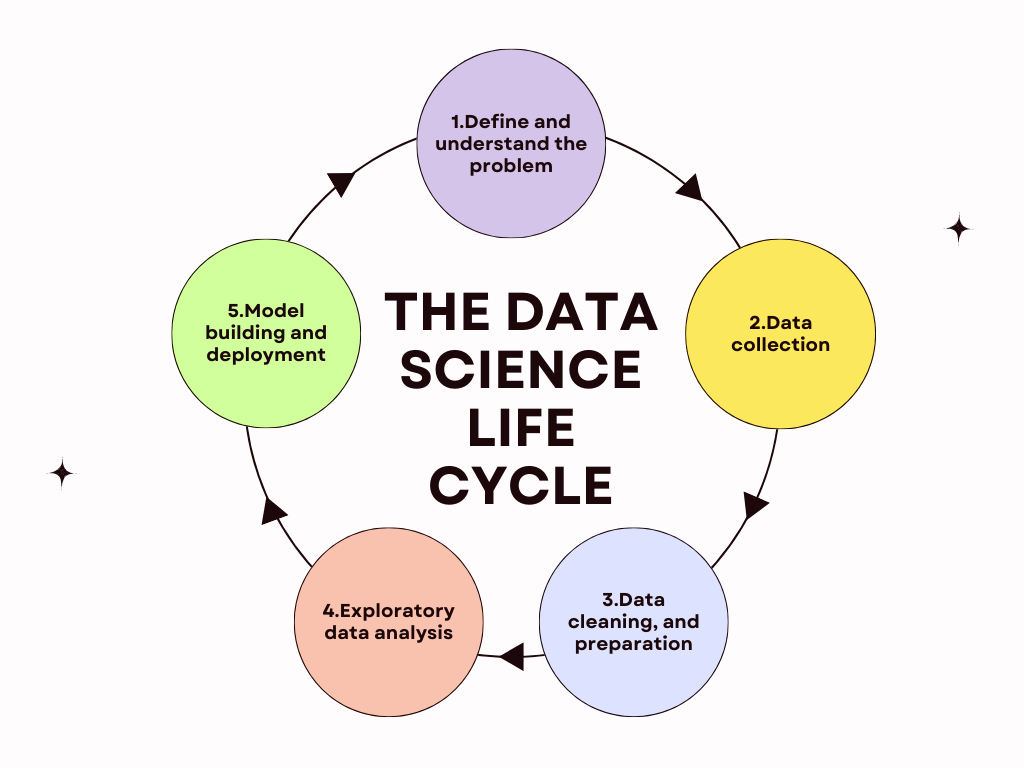 For case studies, we will be guiding you through #1 and #2: our own definition and understanding of the problem, and usually we will have collected and provided the data. As a real world data scientist, these two initial steps will be up to you and how you want to approach it! For today, we'll be focusing on #3 and #4: data cleaning and preparation, and exploratory data analysis.

## Loading the data

A common method for storing data is in the form of a **comma-separated value** file, or **CSV**. Pandas has a really nice and easy to use function that reads in these files for us called `read_csv`.

In [ ]:
ab = pd.read_csv('AB_NYC_2019.csv')
ab

### Granularity
Granularity is the level of detail included in the data. In order to determine the granularity of the dataset, ask, "what does each row in my dataset represent?" High granularity refers to high level of detail (ex. each row represents one peron), while low granularity refers to lower level of detail (ex. each row represents a group of people).

### Discussion
What is the granularity of the data? What does each row represent?

[Your response here]


### Checking the granularity
We can check to see how many unique listing IDs are in the dataset and ask ourselves if this aligns with what we thought about the granularity.

In [ ]:
len(ab['id'].unique())

### Pandas practice for exploring some features about our dataset

The `AB_NYC_2019.csv` file was nicely provided in a sample Kaggle notebook, but we can still try to figure out how our data was generated.

The file name was nicely segmented into `AB_NYC_2019`,which we can infer the `AB` to stand for Airbnb, `NYC` to represent the location of this dataset, and `2019` to be some indication of the year. We can see from the `last_review` column that there also contains the year 2018, so let's see what other years this dataset contains. 

We can outline the following steps to do this:

1. Check the data type of the `last_review` column

2. If it's not of the data type `datetime`, we need to convert the `last_review` to this data type

3. Extract the year from the `last_review` column using a `datetime` function

4. Get a count of how many rows correspond to a certain year in the `last_review` column

In [ ]:
# First, let's check the data type of the 'last_review' column
...

In [ ]:
# Next, let's convert the 'last_review' column to a datetime data type
ab['last_review'] = ...
ab['last_review']

In [ ]:
# Next, let's extract the year from the 'last_review' column using a datetime function
years = ...
years

In [ ]:
# Finally, let's get a count of how many unique years there are in this column
...

### Discussion

Now that we finished this quick exercise, how can we now interpret the `2019` part of the `AB_NYC_2019` filename?

[Your response here]

### Variable types

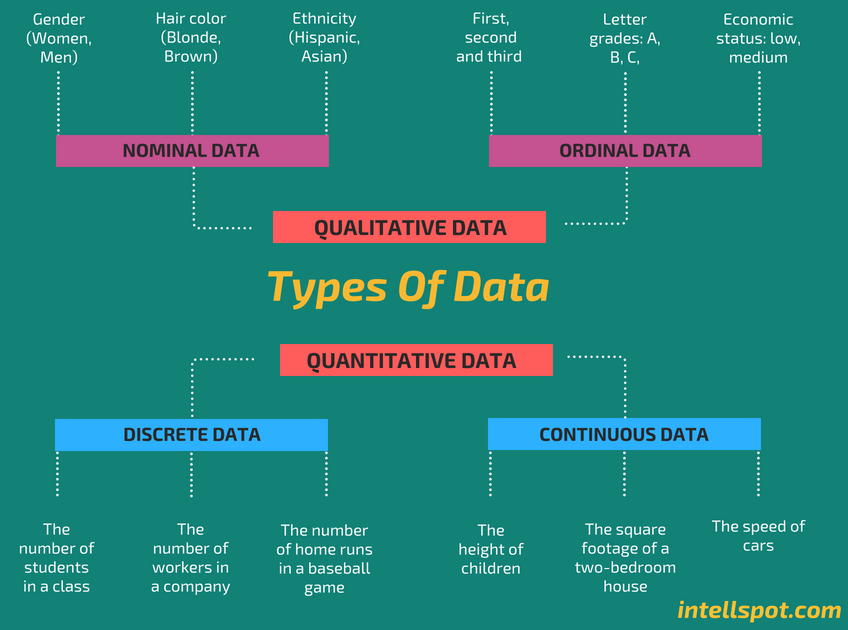

### Discussion

What are the variable types of these columns from our Airbnb dataset?


`host_id`: ...

`neighbourhood_group`: ...

`latitude`: ...

`availability_365`: ...

## Cleaning the Data

### Null values

Null values are missing datapoints in our dataset. They are typically represented as `NaN` in a pandas data frame. We can already see that there's quite a few `NaN` values, especially in the `last_review` and `reviews_per_month` columns. Let's check to see how many null values are also in the dataset among the other columns.

In [ ]:
ab.isnull().sum()

### How to handle null values

There's a vast number of ways to deal with null values, and what you do with the null values always depends on the context of the problem you are trying to answer:

1. **Dropping any records with missing values**: this is usually helpful if the null values provide no meaning to our analysis. However, dropping records might introduce bias, as the missing values might have some importance in understanding our data

2. **Data imputation**: we fill in our missing values with other data in the dataset. The most common types of data imputation methods are filling in missing values with the average (or median) of that field, or applying a regression to predict the missing values.

### Discussion

How should we handle the null values in this dataset?

[Your response here]

In [ ]:
ab = ab.drop([...], axis=1) # Fill in with description
ab = ab.fillna({...: ...}) # Fill in with description
ab

### Renaming columns

We don't know what country the person who got this dataset from is originally from, but the `neighbourhood_group` and `neighbourhood` fields are quite annoying to keep spelling differently! Let's rename `neighbourhood_group` and `neighbourhood` to `borough` and `neighborhood`, respectively. This simple fix can make the rest of our analysis a lot easier.

In [ ]:
ab = ab.rename({...: ..., ...: ...}, axis=1) # Fill in with description
ab

# Exploratory Data Analysis (EDA) and Data Visualization

Matplotlib, aliased as `plt`, and Seaborn, aliased as `sns`, are two common data visualization packages. `plt` is typically used for more basic modelling, while `sns` has quite a few more capabilities. Listed here are common functions for visualization using `plt` and `sns`. Doing a quick Google search for how to use different kinds of plotting functions will usually work and show you how to plot what you need.

### Matplotlib and Seaborn Table of Common Functions

From [Data 100 Spring 2023 HW 4](https://ds100.org/), we have this table of common plotting functions. `x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `plt.boxplot(x)` | Creates a box plot of `x` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE/density curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.countplot(data, x, y, hue)` | Creates a bar chart with the `x` and/or `y` variable with the bar height as the number of occurences for each subcategory based on `hue` |
| `sns.boxplot(data, x, y)` | Creates a box plot of `x` grouped by `y` |


### Looking at the distribution of prices

Now we're interested in looking at the overall distribution of Airbnb prices. We can use `matplotlib`'s `pyplot` aliased as `plt` to do visualize this.

### Contextualizing our dataset with background knowledge and looking at the distribution of our data

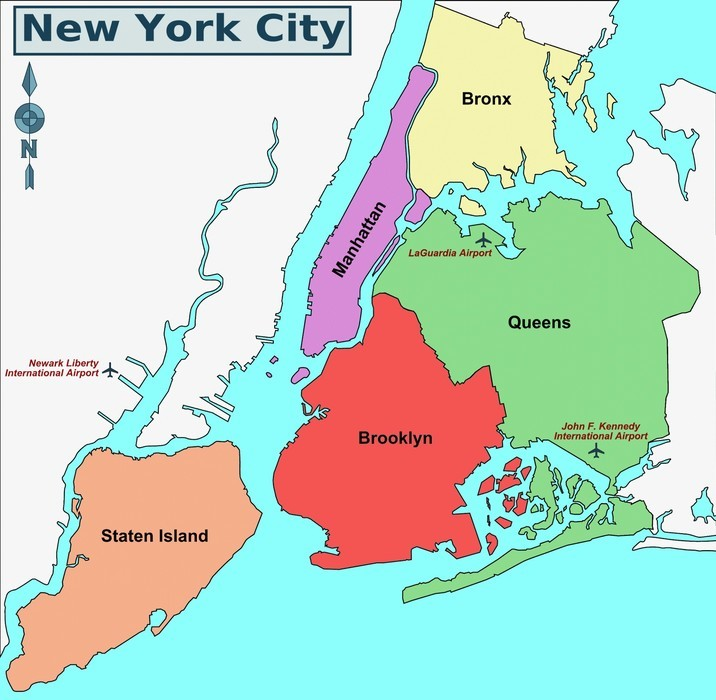
For some background context, NYC has 5 major boroughs as seen in the image. Let's make sure that this Airbnb dataset contains these 5 boroughs.

In [ ]:
ab['borough'].value_counts()

## Bar Plots

While this value counts result is surely informative, we can always try to visualize this data using a bar chart. Bar charts are useful when we want to display counts on qualitative variables. We can use `sns` to display this, since the usual `plt` library we use is a bit more difficult to plot counts. Look at the seaborn documentation about how to create a countplot (Hint: scroll down towards the middle to see countplots and the corresponding code that created the plots)

In [ ]:
plt.title('Airbnb listing counts by borough')
sns.countplot(...);

We can also see if we can do the same for the `neighborhood` columns to see what they look like.

In [ ]:
ab['neighborhood'].value_counts()

### Discussion

Given what we know about the number of neighborhoods, is it a good idea to make a bar plot to visualize the distribution? Why or why not?

[Your response here]

It's also possible to visualize a breakdown of `room_type` per `borough`! Let's make use of the `hue` parameter of the `countplot` function to view it by `borough`.

In [ ]:
plt.title('Airbnb listing counts by room type and borough')
sns.countplot(data=..., x=..., hue=...);

## Histograms

Histograms are a great way to visualize quanititative data. Though it looks similar to a bar plot, bar plots are primarily used for displaying categorical data, while histograms are used to display the distribution of quantitative data. This case study won't cover histograms because it was a topic heavily covered in [Data 8](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html), but it will be covered in the homework.

## Box Plots

Something that is much easier for `plt` to handle is making a boxplot. This is how we can interpret a boxplot. 

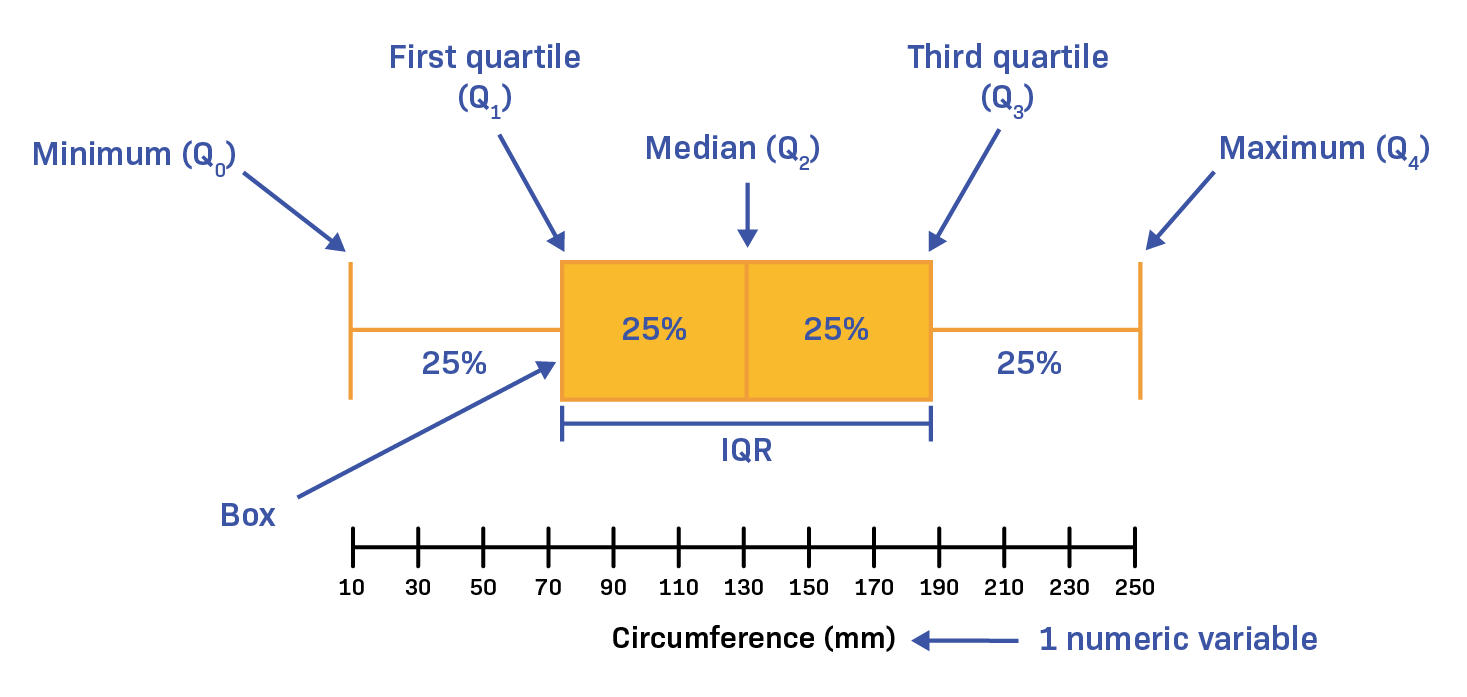 

We can make a boxplot to show the distribution of Airbnb listing prices.

In [ ]:
plt.title('Airbnb listing prices per night')
plt.xlabel('price')
plt.boxplot(data=..., x=..., vert=False);

We can also do the same in `sns`, which looks basically the same with some aesthetic differences. Read the seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to learn how to plot a boxplot! (Hint: scroll down towards the middle to see boxplots and the corresponding code that created the plots)

In [ ]:
plt.title('Airbnb listing prices per night')
sns.boxplot(...);

### Discussion

What do we notice about the data? Why does the boxplot look like this and why is difficult to visualize?

[Your response here]

### Looking at a smaller subset of the distribution of prices

In [ ]:
plt.title('Airbnb listing prices per night under $500')
plt.xlabel('price in dollars')
plt.boxplot(data=ab[...], x=..., vert=False);

In [ ]:
plt.title('Airbnb listing prices per night under $500')
plt.xlabel('price in dollars')
sns.boxplot(...);

This looks more interpretable now! Now let's visualize the distribution of prices for each of the 5 NYC boroughs. `plt` isn't able to do this, so we'll use Seaborn. Seaborn allows us an easy way to visualize this using both the `x` and `y` parameters.

In [ ]:
plt.title('Airbnb listing prices per night under $500 by borough')
sns.boxplot(data=..., x=..., y=...);

## Violin Plots

We can also visualize this same boxplot distribution using a violin plot, which is a hybrid of a box plot and a density plot. A density plot is like a smoothed out histogram and shows what the distribution would look like if the data was continuous. Here is an example of a histogram overlaid with a density curve.

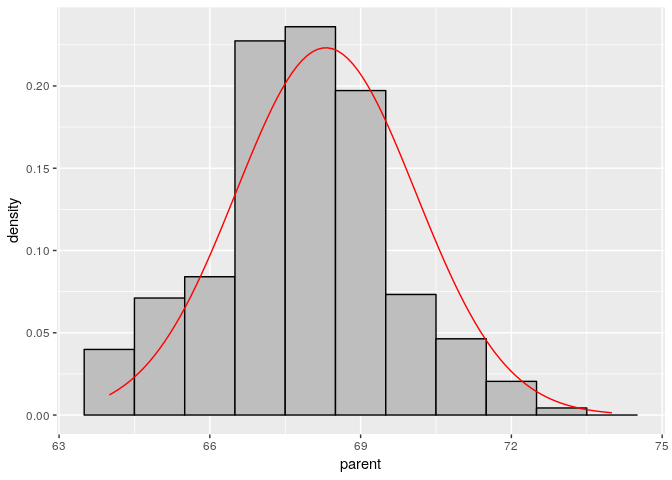

In [ ]:
plt.title('Airbnb listing prices per night under $500 by borough')
sns.violinplot(data=ab[ab['price'] < 500], x='price', y='borough');

### Discussion

What do you notice about the prices now that we're separating the prices based on borough?

[Your response here]

## Skewness

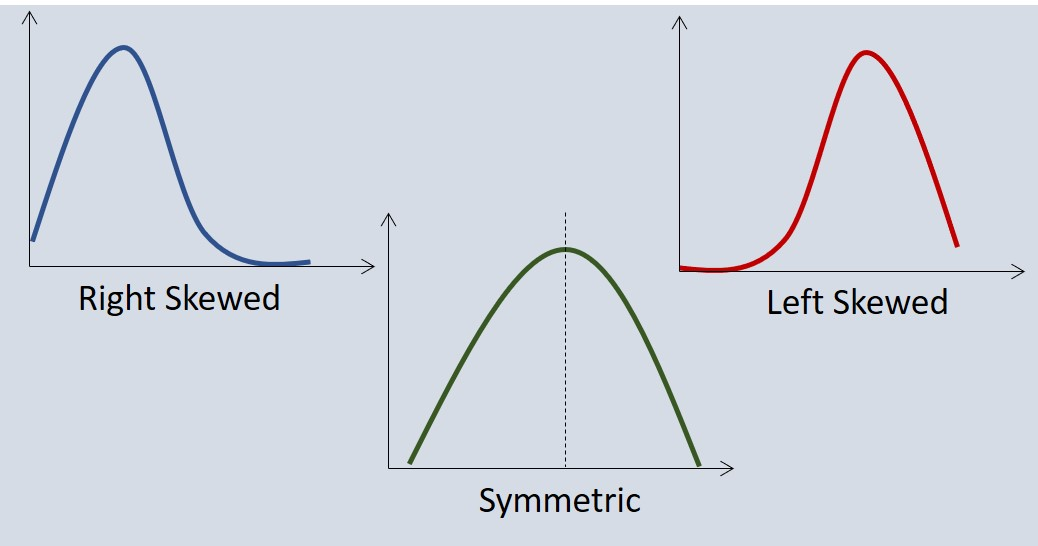

We can use skewness to describe the distribution of data if most of its datapoints are concentrated more on the left or the right side. Why is this important? If we want to model data down the line (ex. make a linear regression model), we want our data to be more linear. If we know which direction our data is skewed, we can apply appropriate transformations to make it more linear.

### Discussion

What direction is the distribution of prices skewed?

[Your response here]

### Visualizing our data on the map

We're also given coordinates in our dataset, so we should go ahead and use them. This is a bit more involved, but you'd never be expected to know this off the top of your head. Learning how to do a quick Google search can help you go a long way.

Let's plot a scatterplot of the Airbnb listing prices and their corresponding location based on the latitude and longitude.

In [ ]:
plt.title('Airbnb listing prices by location')
plt.xlabel('longitude')
plt.ylabel('latitude')
# the cmap argument sets the color scheme, and alpha sets the transparency of the scatter plot points
plt.scatter(data=ab, x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), alpha=0.4)
# enabling the color bar on the right to indicate prices
plt.colorbar();

Because of the outliers, we can hardly see any distribution! Let's take a look at just those less than $500 per night.

In [ ]:
# filtering out to only display prices less than $500/day
ab_less_500 = ab[ab['price'] < 500]
plt.title('Airbnb listing prices by location less than $500 per night')
plt.xlabel('longitude')
plt.ylabel('latitude')
# the cmap argument sets the color scheme, and alpha sets the transparency of the scatter plot points
plt.scatter(data=ab_less_500, x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), alpha=0.4)
# enabling the color bar on the right to indicate prices
plt.colorbar();

In [ ]:
import urllib
# setting the size of our plot
plt.figure(figsize=(10,8))
# loading the png NYC image
nyc_img=plt.imread('Images/nyc_map.png')
plt.title('Airbnb listing prices by location less than $500 per night')
plt.xlabel('longitude')
plt.ylabel('latitude')
# scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
# the cmap argument sets the color scheme, and alpha sets the transparency of the scatter plot points
plt.scatter(data=ab_less_500, x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), alpha=0.4)
# enabling the color bar on the right to indicate prices
plt.colorbar();

We're now able to see the scatter plot projected onto the map! Super cool! We can also take this as a sanity check to ensure that there aren't any data points directly on the water or in neighboring states.

# Conclusion

Throughout this notebook, we've been able to see how we can explore, clean, and visualize our data. We've learned how to:

- Change the data type of a Pandas dataframe column

- Understand the different types of variables

- Deal with null values

- Visualize our data using different types of plots

# References

-[NYC Airbnb Kaggle EDA Notebook](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/notebook)

-[Data 100 Supplemental Notes](https://ds100.org/course-notes/)

-[Data 100 Spring 2023 HW 4](https://ds100.org/)